[1] "8d" "8c" "7d" "7c"

[1] "ID" "MD" "SD" "RW"

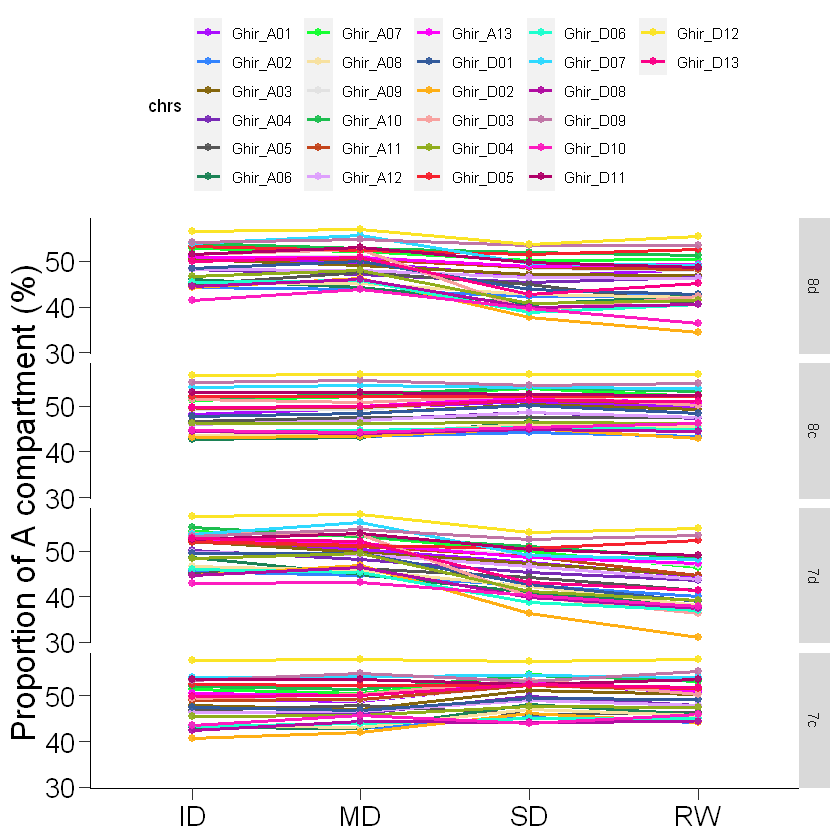

In [38]:
# 每条染色体A compartment 动态变化
rm(list = ls())
#options(repr.plot.width=2,repr.plot.height=2.5)
setwd('G:/Billfish/boyang/HiC/compartment/100k/cworld')
library(ggplot2)
library(ggpubr)
library(ggrepel)
library(paletteer)
df <- read.csv("all_A_cpt_lenght.bed", sep='\t', header=T)
df <- within(df, sig <- factor(sig, levels = c("8d", "8c", "7d", "7c")))
with(df, levels(sig))
df <- within(df, time <- factor(time, levels = c("ID", 'MD', "SD", 'RW')))
with(df, levels(time))
fg <- ggplot(df, aes(x = time, y = ratio*100, group=chrs, color=chrs)) + 
geom_line(size=1)+
geom_point(size=2, alpha=0.9)+
#geom_text_repel(aes(x = time, y = number+0.1, label = number))+
labs(x=NULL, y="Proportion of A compartment (%)", fill=NULL)+
facet_grid(sig~.)+
theme(panel.background = element_blank(),
      panel.grid = element_blank(),
      axis.line=element_line(linetype=1,color="black"),
      axis.ticks.length = unit(0.25, "cm"),
      axis.text = element_text(size=16, color="black"),
      axis.title = element_text(size=20),
      legend.position = 'top'
     )+
scale_color_paletteer_d("Polychrome::alphabet")
#scale_color_manual(values = c("#FA5B4B","#FA5B4B"))
fg
ggsave(plot = fg, filename = "all_A_cpt_lenght.pdf", height = 8, width = 8)